In [19]:
import pandas as pd

orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')
pd.set_option('display.max_columns', None)

In [25]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)
orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

In [27]:
orders.head(10)
# returns.head(10)
# orders['Order.ID']
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [42]:
def month_to_season(month):
  if month in [3,4,5]:
    month = 'spring'
  elif month in [6,7,8]:
    month = 'summer'
  elif month in [9,10,11]:
    month = 'fall'
  else:
    month = 'winter'
  return(month)

In [43]:
orders['season'] = orders.Month.apply(month_to_season)

In [44]:
orders.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season
8254,20676,IN-2013-BT11680144-41446,6/21/13,6/23/13,Second Class,BT-11680144,Brian Thompson,Consumer,NaN,Ho Chi Minh City,Ho Chí Minh City,Vietnam,Southeastern Asia,Asia Pacific,FUR-CH-5447,Furniture,Chairs,"Office Star Rocking Chair, Black",303.27,3,0.27,37.32,40.960,Medium,6,summer
36536,41571,EG-2013-AH21038-41489,8/3/13,8/7/13,Standard Class,AH-21038,Alan Hwang,Consumer,NaN,Alexandria,Al Iskandariyah,Egypt,North Africa,Africa,OFF-BI-3188,Office Supplies,Binders,"Avery 3-Hole Punch, Economy",55.74,2,0.00,27.84,3.130,Medium,8,summer
3944,26438,IN-2015-PG18895130-42168,6/13/15,6/18/15,Second Class,PG-18895130,Paul Gonzalez,Consumer,NaN,Bangkok,Bangkok,Thailand,Southeastern Asia,Asia Pacific,TEC-MA-5001,Technology,Machines,"Konica Calculator, Wireless",514.23,12,0.17,192.03,80.630,Medium,6,summer
38018,47286,SA-2014-GD4590110-41870,8/19/14,8/21/14,Second Class,GD-4590110,Giulietta Dortch,Corporate,NaN,Riyadh,Ar Riyad,Saudi Arabia,Western Asia,Asia Pacific,OFF-SU-6160,Office Supplies,Supplies,"Stiletto Box Cutter, Easy Grip",37.59,1,0.00,2.25,2.730,Medium,8,summer
39763,18040,ES-2014-LP1708045-41640,1/1/14,1/6/14,Standard Class,LP-1708045,Liz Pelletier,Consumer,NaN,Dole,Bourgogne-Franche-Comté,France,Western Europe,Europe,OFF-AR-3545,Office Supplies,Art,"Boston Pencil Sharpener, Water Color",64.26,2,0.00,32.10,2.300,Medium,1,winter
1744,31126,ID-2013-JB159257-41527,9/10/13,9/17/13,Standard Class,JB-159257,Joni Blumstein,Consumer,NaN,Traralgon,Victoria,Australia,Oceania,Asia Pacific,OFF-AP-4964,Office Supplies,Appliances,"KitchenAid Stove, Black",2050.49,6,0.40,-512.71,146.820,Medium,9,fall
28798,14397,ES-2013-TB2125045-41541,9/24/13,9/28/13,Standard Class,TB-2125045,Tim Brockman,Consumer,NaN,Fontaine,Auvergne-Rhône-Alpes,France,Western Europe,Europe,OFF-EN-5022,Office Supplies,Envelopes,"Kraft Business Envelopes, Recycled",131.88,7,0.00,64.47,6.060,Medium,9,fall
34475,16197,ES-2014-GM1469548-41917,10/5/14,10/9/14,Standard Class,GM-1469548,Greg Maxwell,Corporate,NaN,Dresden,Saxony,Germany,Western Europe,Europe,OFF-PA-4145,Office Supplies,Paper,"Enermax Cards & Envelopes, Premium",23.55,1,0.50,-9.90,3.750,High,10,fall
20670,8954,MX-2014-CD1198051-41991,12/18/14,12/22/14,Second Class,CD-1198051,Carol Darley,Consumer,NaN,Amatitlán,Guatemala,Guatemala,Central America,LATAM,OFF-AR-6126,Office Supplies,Art,"Stanley Sketch Pad, Easy-Erase",89.40,3,0.00,26.82,11.796,High,12,winter
2194,26101,IN-2015-AJ1078058-42245,8/29/15,9/4/15,Standard Class,AJ-1078058,Anthony Jacobs,Corporate,NaN,Tirupati,Andhra Pradesh,India,Southern Asia,Asia Pacific,FUR-BO-5951,Furniture,Bookcases,"Sauder Classic Bookcase, Traditional",871.98,2,0.00,322.62,126.020,Low,8,summer


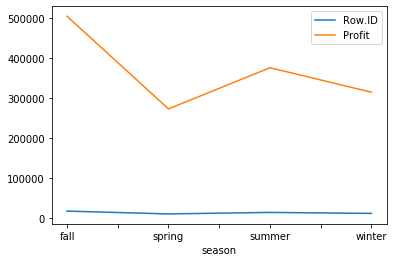

In [55]:
orders.groupby('season','').agg({'Row.ID':'count', 'Profit':'sum'}).plot()